In [1]:
## Ashlyn Brown
## February 12th, 2025
## Group 6
## DATA 6550 - Bias Group Project

In [2]:
## ViolentParsedFilt Data

import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

file_path = '/Users/ashlyn/Desktop/DATA 6550/data/cox-violent-parsed_filt.csv'

ViolentParsedFilt = pd.read_csv(file_path)

ViolentParsedFilt.head()

### uploading the data

,id,name,first,last,sex,dob,age,age_cat,race,juv_fel_count,...,vr_charge_desc,type_of_assessment,decile_score.1,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,priors_count.1,event
0,1.0,miguel hernandez,miguel,hernandez,Male,18/04/1947,69,Greater than 45,Other,0,...,NaN,Risk of Recidivism,1,Low,14/08/2013,Risk of Violence,1,Low,0,0
1,2.0,miguel hernandez,miguel,hernandez,Male,18/04/1947,69,Greater than 45,Other,0,...,NaN,Risk of Recidivism,1,Low,14/08/2013,Risk of Violence,1,Low,0,0
2,3.0,michael ryan,michael,ryan,Male,06/02/1985,31,25 - 45,Caucasian,0,...,NaN,Risk of Recidivism,5,Medium,31/12/2014,Risk of Violence,2,Low,0,0
3,4.0,kevon dixon,kevon,dixon,Male,22/01/1982,34,25 - 45,African-American,0,...,Felony Battery (Dom Strang),Risk of Recidivism,3,Low,27/01/2013,Risk of Violence,1,Low,0,1
4,5.0,ed philo,ed,philo,Male,14/05/1991,24,Less than 25,African-American,0,...,NaN,Risk of Recidivism,4,Low,14/04/2013,Risk of Violence,3,Low,4,0


### I noticed that there are some duplicates in the data set. It would not make sense to remove those, because:

##### Each person's multiple crimes provide valuable insight into recidivism patterns and prior convictions, which are crucial for identifying biases in sentencing and risk assessment.
##### COMPAS scores consider prior offenses, so removing duplicates could distort the data and misrepresent how the algorithm evaluates risk.
##### The analysis of felony counts and recidivism rates relies on the full dataset, meaning removing repeat offenders could artificially lower crime counts and affect trends.

In [4]:
## ViolentParsedFilt Data

print(ViolentParsedFilt.dtypes)

### showing data types

id                         float64
name                        object
first                       object
last                        object
sex                         object
dob                         object
age                          int64
age_cat                     object
race                        object
juv_fel_count                int64
decile_score                 int64
juv_misd_count               int64
juv_other_count              int64
priors_count                 int64
days_b_screening_arrest    float64
c_jail_in                   object
c_jail_out                  object
c_days_from_compas         float64
c_charge_degree             object
c_charge_desc               object
is_recid                     int64
r_charge_degree             object
r_days_from_arrest         float64
r_offense_date              object
r_charge_desc               object
r_jail_in                   object
violent_recid              float64
is_violent_recid             int64
vr_charge_degree    

In [5]:
## ViolentParsedFilt Data

ViolentParsedFilt['dob'] = pd.to_datetime(ViolentParsedFilt['dob'], errors='coerce')
ViolentParsedFilt['screening_date'] = pd.to_datetime(ViolentParsedFilt['screening_date'], errors='coerce')
ViolentParsedFilt['r_offense_date'] = pd.to_datetime(ViolentParsedFilt['r_offense_date'], errors='coerce')
ViolentParsedFilt['r_jail_in'] = pd.to_datetime(ViolentParsedFilt['r_jail_in'], errors='coerce')
ViolentParsedFilt['vr_offense_date'] = pd.to_datetime(ViolentParsedFilt['vr_offense_date'], errors='coerce')

### changing dates from object to datetime

In [6]:
## ViolentParsedFilt Data

ViolentParsedFilt.isnull().sum()

### checking for nulls
### quite a few, which to drop? 

id                          7315
name                           0
first                          0
last                           0
sex                            0
dob                            0
age                            0
age_cat                        0
race                           0
juv_fel_count                  0
decile_score                   0
juv_misd_count                 0
juv_other_count                0
priors_count                   0
days_b_screening_arrest     1297
c_jail_in                   1297
c_jail_out                  1297
c_days_from_compas           867
c_charge_degree              867
c_charge_desc                881
is_recid                       0
r_charge_degree             9899
r_days_from_arrest         11957
r_offense_date             14963
r_charge_desc              10039
r_jail_in                  11957
violent_recid              18316
is_violent_recid               0
vr_charge_degree           16977
vr_offense_date            17766
vr_charge_

In [7]:
## ViolentParsedFilt Data

ViolentParsedFilt['days_b_screening_arrest'].fillna(ViolentParsedFilt['days_b_screening_arrest'].median(), inplace=True)
ViolentParsedFilt['c_days_from_compas'].fillna(ViolentParsedFilt['c_days_from_compas'].median(), inplace=True)

### fill missing numerical columns with median

In [8]:
## ViolentParsedFilt Data

ViolentParsedFilt['c_jail_in'].fillna('Unknown', inplace=True)
ViolentParsedFilt['c_jail_out'].fillna('Unknown', inplace=True)
ViolentParsedFilt['r_jail_in'].fillna('Unknown', inplace=True)

### fill missing date-related columns with a placeholder 'Unknown'

In [9]:
## ViolentParsedFilt Data

ViolentParsedFilt['c_charge_degree'].fillna('Unknown', inplace=True)
ViolentParsedFilt['c_charge_desc'].fillna('Unknown', inplace=True)
ViolentParsedFilt['r_charge_degree'].fillna('Unknown', inplace=True)
ViolentParsedFilt['r_charge_desc'].fillna('Unknown', inplace=True)

### fill missing categorical columns with 'Unknown'

In [10]:
## ViolentParsedFilt Data

ViolentParsedFilt['score_text'].fillna('Unknown', inplace=True)
ViolentParsedFilt['v_score_text'].fillna('Unknown', inplace=True)
ViolentParsedFilt['vr_charge_desc'].fillna('Unknown', inplace=True)

### fill missing text columns with 'Unknown'

In [11]:
## ViolentParsedFilt Data

print(ViolentParsedFilt.isnull().sum())

### verify that missing values have been handled

id                          7315
name                           0
first                          0
last                           0
sex                            0
dob                            0
age                            0
age_cat                        0
race                           0
juv_fel_count                  0
decile_score                   0
juv_misd_count                 0
juv_other_count                0
priors_count                   0
days_b_screening_arrest        0
c_jail_in                      0
c_jail_out                     0
c_days_from_compas             0
c_charge_degree                0
c_charge_desc                  0
is_recid                       0
r_charge_degree                0
r_days_from_arrest         11957
r_offense_date             14963
r_charge_desc                  0
r_jail_in                      0
violent_recid              18316
is_violent_recid               0
vr_charge_degree           16977
vr_offense_date            17766
vr_charge_

In [12]:
## ViolentParsedFilt Data

felony_by_race_gender = ViolentParsedFilt.groupby(['race', 'sex'])['juv_fel_count'].sum().reset_index()

print(felony_by_race_gender)

### group by race and gender to summarize the juvenile felony count

                race     sex  juv_fel_count
0   African-American  Female             54
1   African-American    Male           1067
2              Asian  Female              0
3              Asian    Male              0
4          Caucasian  Female              3
5          Caucasian    Male            171
6           Hispanic  Female              2
7           Hispanic    Male             67
8    Native American  Female              0
9    Native American    Male             14
10             Other  Female              2
11             Other    Male             28


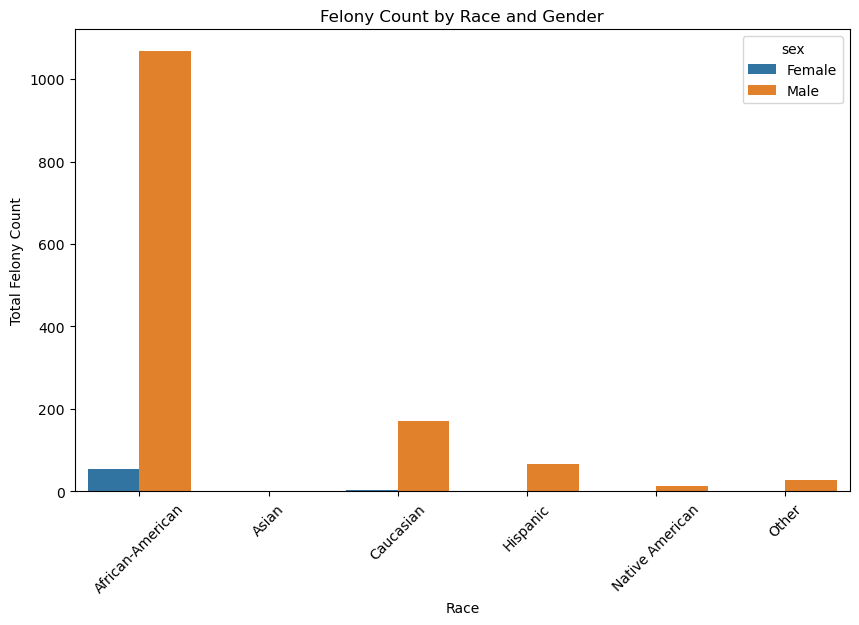

In [13]:
## ViolentParsedFilt Data 

felony_by_race_gender = ViolentParsedFilt.groupby(['race', 'sex'])['juv_fel_count'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='race', y='juv_fel_count', hue='sex', data=felony_by_race_gender)
plt.title('Felony Count by Race and Gender')
plt.xlabel('Race')
plt.ylabel('Total Felony Count')
plt.xticks(rotation=45) 
plt.show()                                                    

### bar plot to visualize felony count by race and gender

#### African-American males have the highest felony count by a significant margin.
#### African-American females have a lower count but are still present.
#### Caucasian males have the second-highest felony count, though significantly lower than African-American males.
#### Other racial groups (Asian, Hispanic, Native American, and Other) show relatively low felony counts, with males consistently having higher counts than females.

# Summary

### African-American males having the highest felony counts may indicate higher recidivism rates within this group. This could result from systemic factors such as socioeconomic disparities, biased sentencing, or differences in law enforcement practices.

### African-American females still having a presence in felony counts suggests that while recidivism is more pronounced among males, it is not exclusive to them. However, their lower numbers may indicate different social circumstances, sentencing patterns, or rehabilitation outcomes for women.

### Caucasian males having the second-highest felony counts reinforces the idea that recidivism is not solely a racial issue but is also influenced by other factors like access to legal representation, socioeconomic status, and community support systems.

### Lower felony counts in other racial groups suggest either lower initial involvement in crime or better rehabilitation outcomes. However, it could also indicate disparities in arrest rates, judicial leniency, or differences in the types of offenses committed.

## Possible Implications for Recidivism:

### Systemic Bias: The high felony counts for African-American males might indicate that they are more likely to be re-arrested, convicted, or sentenced more harshly than other groups.
### Economic & Social Factors: Recidivism rates are often tied to poverty, lack of education, and employment barriers—factors disproportionately affecting certain racial groups.
### Rehabilitation & Support Systems: Groups with lower felony counts may have better access to rehabilitation programs, mental health support, or community resources that reduce reoffending.

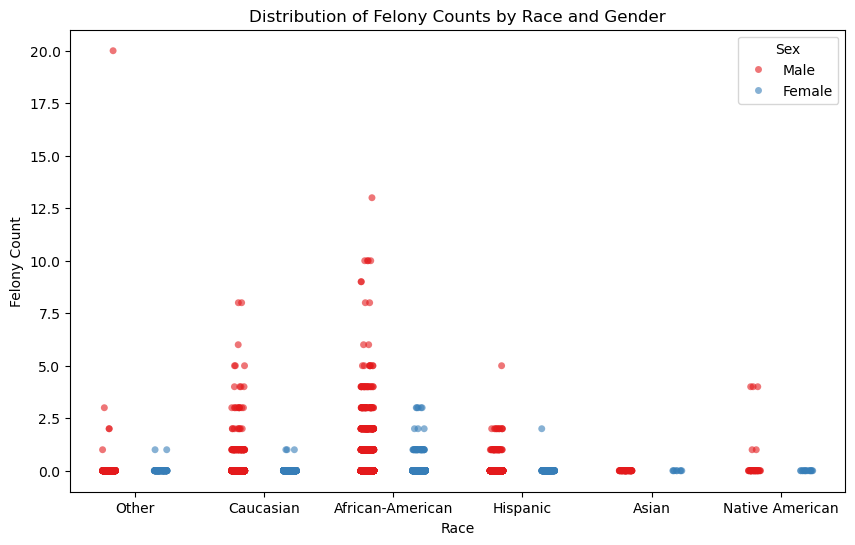

In [42]:
## ViolentParsedFilt Data 

plt.figure(figsize=(10, 6))

sns.stripplot(x='race', y='juv_fel_count', hue='sex', data=ViolentParsedFilt, palette='Set1', dodge=True, jitter=True, alpha=0.6)

plt.title('Distribution of Felony Counts by Race and Gender')
plt.xlabel('Race')
plt.ylabel('Felony Count')
plt.legend(title='Sex')

plt.show()

### boxplot for felony counts by race and gender

#### Males (red) generally have higher felony counts across all racial groups compared to females (blue).
#### African-American males show the highest felony counts, with multiple instances exceeding 5+ felonies.
#### Caucasian males also have relatively high felony counts, though lower than African-American males.
#### Hispanic, Native American, and Other racial groups show moderate felony counts, with a clear male dominance in felony numbers.
#### Asian individuals (both male and female) have the lowest felony counts overall.

# Summary:
 
### Males have higher felony counts across all racial groups → This suggests that men are more likely to reoffend than women. This aligns with broader criminology research, which shows that males have higher recidivism rates due to social, economic, and behavioral factors.


### African-American males having the highest felony counts (often exceeding 5 felonies) → This could indicate:

#### Higher recidivism rates among this group.
#### Harsher sentencing and policing policies, leading to repeated incarcerations.
#### Systemic barriers such as difficulty reintegrating into society (e.g., employment discrimination, parole restrictions).
#### Caucasian males having relatively high felony counts → Though lower than African-American males, this suggests that recidivism is a significant issue here as well. Factors like drug-related offenses, economic instability, and criminal justice policies may contribute.


### Moderate felony counts in Hispanic, Native American, and Other racial groups → This suggests that while recidivism exists, it might be lower than in African-American and Caucasian populations. However, underreporting, differences in law enforcement focus, and community support could also play a role.


### Asian individuals having the lowest felony counts overall → This might indicate:

#### Lower overall crime rates within this group due to cultural, social, or economic factors.
#### Lower recidivism rates, possibly linked to stronger community ties or access to rehabilitation programs.
#### Differences in law enforcement attention, where certain crimes may not be as heavily policed.


### Implications for Recidivism Reduction:

#### Targeted rehabilitation for high-recidivism groups (African-American and Caucasian males).
#### Addressing systemic issues like employment barriers, parole restrictions, and biased sentencing.
#### Investing in early intervention programs to prevent first-time offenses from turning into repeat offenses.

In [15]:
## ViolentParsedFilt Data 

top_10_felony_by_race_gender = felony_by_race_gender.sort_values(by='juv_fel_count', ascending=False).head(10)
print(top_10_felony_by_race_gender)

### sorting the top 10 felonies by race 

                race     sex  juv_fel_count
1   African-American    Male           1067
5          Caucasian    Male            171
7           Hispanic    Male             67
0   African-American  Female             54
11             Other    Male             28
9    Native American    Male             14
4          Caucasian  Female              3
6           Hispanic  Female              2
10             Other  Female              2
2              Asian  Female              0


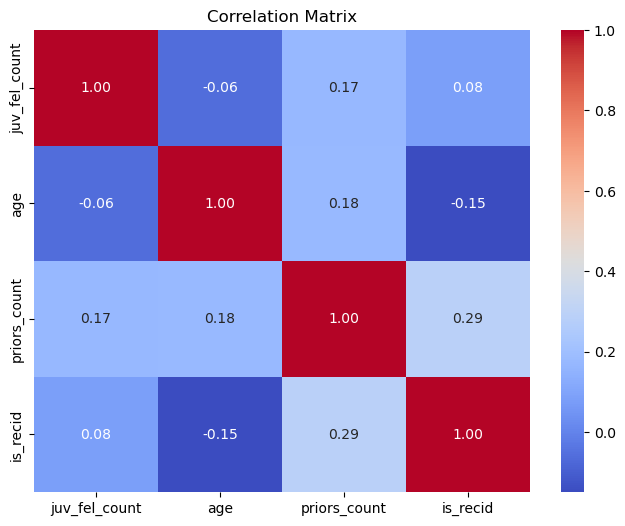

In [16]:
## ViolentParsedFilt Data 

correlation_matrix = ViolentParsedFilt[['juv_fel_count', 'age', 'priors_count', 'is_recid']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### correlation matrix to find correlations between numerical columns

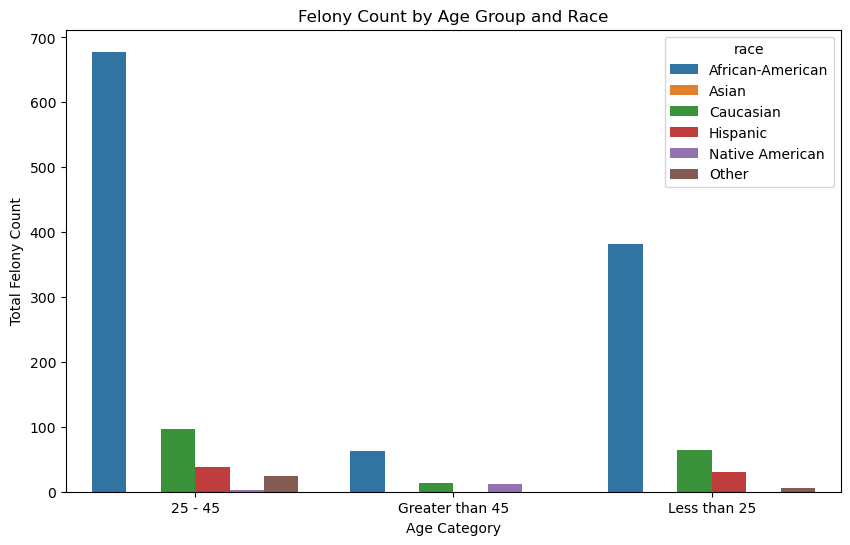

In [17]:
## ViolentParsedFilt Data 

felony_by_age_category = ViolentParsedFilt.groupby(['age_cat', 'race'])['juv_fel_count'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='age_cat', y='juv_fel_count', hue='race', data=felony_by_age_category)
plt.title('Felony Count by Age Group and Race')
plt.xlabel('Age Category')
plt.ylabel('Total Felony Count')
plt.show()

### group by age category and race, sum the juvenile felony counts
### plotting the felony counts by age group

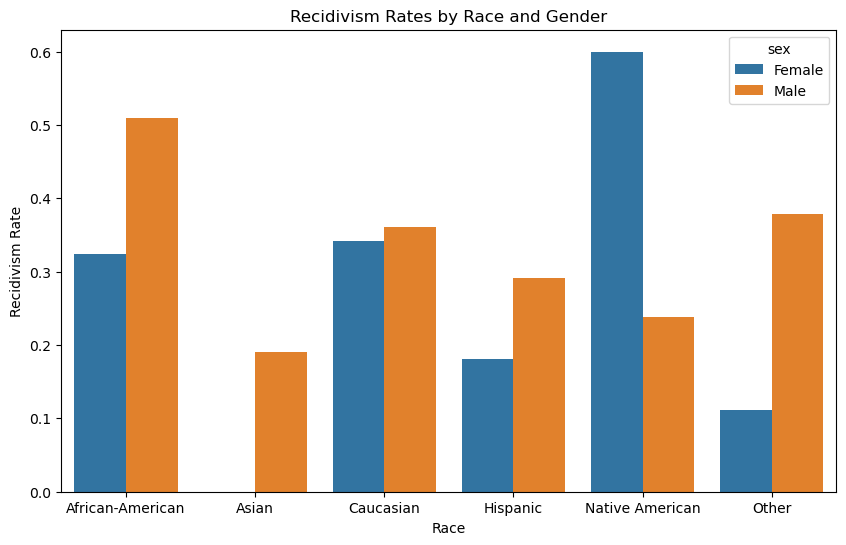

In [18]:
## ViolentParsedFilt Data 

recidivism_by_race_gender = ViolentParsedFilt.groupby(['race', 'sex'])['is_recid'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='race', y='is_recid', hue='sex', data=recidivism_by_race_gender)
plt.title('Recidivism Rates by Race and Gender')
plt.xlabel('Race')
plt.ylabel('Recidivism Rate')
plt.show()

### group by race and sex to calculate recidivism rates
### plot recidivism rates by race and gender

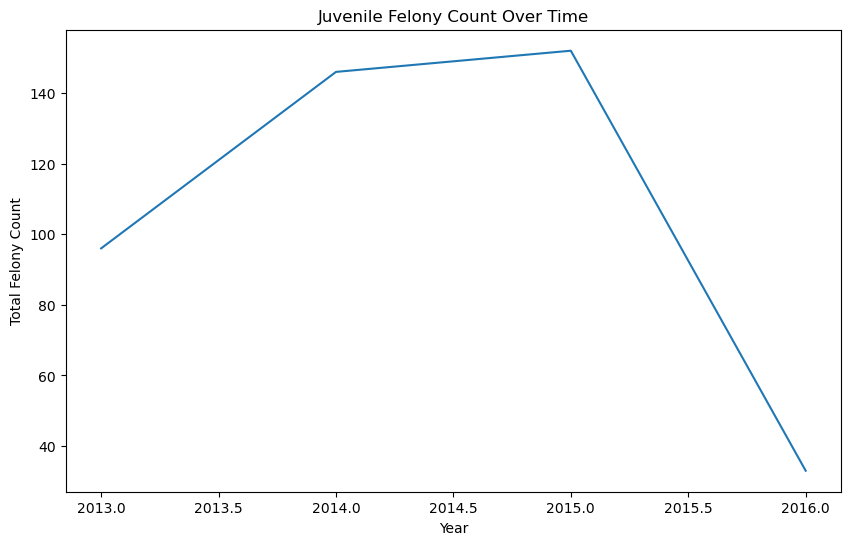

In [19]:
## ViolentParsedFilt Data 

ViolentParsedFilt['r_offense_year'] = ViolentParsedFilt['r_offense_date'].dt.year
felony_by_year = ViolentParsedFilt.groupby('r_offense_year')['juv_fel_count'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='r_offense_year', y='juv_fel_count', data=felony_by_year)
plt.title('Juvenile Felony Count Over Time')
plt.xlabel('Year')
plt.ylabel('Total Felony Count')
plt.show()

### extract year from offense date and group by it to analyze trends over time
### plot felony counts over time